In [1]:
from Camera import Camera
import numpy as np
from Points3D import Points3D
from ImageFly import ImageFly
import matplotlib.pyplot as plt
from GenerateGsInput import GenerateGsInput
import Plotters
import plotly.graph_objects as go
import scipy.io
import pandas as pd

%matplotlib qt


def load_hull(body_wing,path):
    return scipy.io.loadmat(f'{path}/3d_pts/{body_wing}.mat')['hull']

path = 'G:/My Drive/Research/gs_data/mov19_2022_03_03/'
frames = [300,400]


image_name = []
image_name += [f'P{frame}CAM{cam + 1}.jpg' for frame in frames for cam in range(4)]

real_coord = scipy.io.loadmat(f'{path}/3d_pts/real_coord.mat')['all_coords']

points_3d = {body_wing : pd.DataFrame(load_hull(body_wing,path),columns = ['X','Y','Z','frame']) for body_wing in ['body','rwing','lwing']}

cameras = {f'cam{cam + 1}':Camera(path,cam) for cam in range(4)}
images = {im_name:ImageFly(path,im_name) for im_name in image_name}
points = {f'frame{frame}':Points3D(points_3d,real_coord,frame) for frame in frames}


gen_gs_data = GenerateGsInput(path,images,cameras)
gen_gs_data.generate_camera_text()
gen_gs_data.save_croped_images()



In [3]:

im_name = 'P300CAM4.jpg'
points3d_name = f'frame{im_name.split("CAM")[0].split("P")[1]}'
voxels_sorted_by_z,pixels = points[points3d_name].z_buffer(images[im_name],croped_camera_matrix = True)
images[im_name].map_3d_2d(voxels_sorted_by_z,pixels,croped_image = True)

images[im_name].pixel_with_idx


plt.figure()
plt.scatter(images[im_name].pixel_with_idx[:,0],images[im_name].pixel_with_idx[:,1])
images[im_name].pixel_with_idx.shape





(4032, 3)

In [4]:

im_name = 'P300CAM3.jpg'
points3d_name = f'frame{im_name.split("CAM")[0].split("P")[1]}'
voxels_sorted_by_z,pixels,idx = points[points3d_name].z_buffer(images[im_name],camera_matrix = False)
images[im_name].map_3d_2d(voxels_sorted_by_z,pixels,idx,croped_image = True)

plt.figure()
plt.scatter(images[im_name].pixel_with_idx[:,0],images[im_name].pixel_with_idx[:,1])
images[im_name].voxels_with_idx

array([[-2.450e-03, -1.185e-02,  1.450e-03,  1.000e+00],
       [-2.200e-03, -1.175e-02,  1.400e-03,  2.000e+00],
       [-2.350e-03, -1.185e-02,  1.450e-03,  3.000e+00],
       ...,
       [ 5.500e-04, -1.190e-02,  2.400e-03,  1.680e+03],
       [ 5.000e-04, -1.190e-02,  2.400e-03,  1.681e+03],
       [ 5.000e-04, -1.185e-02,  2.450e-03,  1.682e+03]])

In [11]:
images[im_name].pixel_with_idx
size_pixels = images[im_name].pixel_with_idx.shape
images[im_name].pixel_with_idx.reshape(size_pixels[0]*size_pixels[1])

array([ 38.,  55.,   1., ..., 134., 100.,  -1.])

In [4]:
import os
path = 'G:/My Drive/Research/gs_data/mov19_2022_03_03'

images_folder = f'{path}/input_data_for_gs/sparse/' 
if not os.path.exists(f'{path}/input_data_for_gs/sparse/'):
    os.makedirs(images_folder)


with open(f'{images_folder}/images.txt', "w") as file:
    file.write("# Image list with two lines of data per image:\n#")
    file.write("#   IMAGE_ID, QW, QX, QY, QZ, TX, TY, TZ, CAMERA_ID, NAME\n")
    file.write("#   POINTS2D[] as (X, Y, POINT3D_ID)\n")
    file.write(f"# Number of images: {len(images)}, mean observations per image: 2 \n")

    for idx,(frames_name,image) in enumerate(images.items()): 

        camera_data = [idx] + list(image.qvec) + list(image.t.T[0]) + [image.camera_number] + [frames_name]
        print(camera_data)
        file.write(" ".join(map(str, camera_data)) + "\n")
        size_pixels = images[im_name].pixel_with_idx.shape
        file.write(" ".join(map(str, images[im_name].pixel_with_idx.reshape(size_pixels[0]*size_pixels[1]))) + "\n")

[0, 0.4014182, -0.7619356, 0.4480878, -0.2398643, 0.0009995330536695464, 0.000963379647275542, 0.27667278893559305, 1, 'P300CAM1.jpg']
[1, 0.0101965, 0.49418, -0.4900953, 0.7179755, 2.3405244476857152e-06, -0.003103373568684653, 0.19604126118852686, 2, 'P300CAM2.jpg']
[2, 0.0055668, -0.5137345, -0.4945976, 0.7010129, -0.0018709171011325818, -0.0016270343699767798, 0.19135574843655634, 3, 'P300CAM3.jpg']
[3, 0.0049966, -0.9999007, -0.0003647, -0.0131729, 0.002034118658308913, -0.002187200103057826, 0.19123460135434145, 4, 'P300CAM4.jpg']
[4, 0.4014182, -0.7619356, 0.4480878, -0.2398643, 0.0009995330536695464, 0.000963379647275542, 0.27667278893559305, 1, 'P400CAM1.jpg']
[5, 0.0101965, 0.49418, -0.4900953, 0.7179755, 2.3405244476857152e-06, -0.003103373568684653, 0.19604126118852686, 2, 'P400CAM2.jpg']
[6, 0.0055668, -0.5137345, -0.4945976, 0.7010129, -0.0018709171011325818, -0.0016270343699767798, 0.19135574843655634, 3, 'P400CAM3.jpg']
[7, 0.0049966, -0.9999007, -0.0003647, -0.0131729,

In [5]:
images[im_name].pixel_with_idx

array([[ 3.8000e+01,  5.5000e+01,  1.6339e+04],
       [ 3.8000e+01,  5.6000e+01,  1.6496e+04],
       [ 3.9000e+01,  5.5000e+01,  1.6318e+04],
       ...,
       [ 1.3400e+02,  9.7000e+01, -1.0000e+00],
       [ 1.3400e+02,  9.8000e+01, -1.0000e+00],
       [ 1.3400e+02,  1.0000e+02, -1.0000e+00]])

In [7]:
points = Points3D(path)
points.get_frame(300)
points.idx_to_real()
points.points_in_ew_frame = np.matmul(cameras['cam2'].world_to_cam , points.points_in_ew_frame_homo.T).T


In [8]:
voxels_sorted_by_z,pixels = points.z_buffer(images[f'P300CAM2.jpg'])
images[f'P300CAM2.jpg'].map_3d_2d(voxels_sorted_by_z,pixels)




fig = go.Figure()
Plotters.scatter3d(fig,voxels_sorted_by_z,'red',3)


In [10]:
print(images[f'P300CAM2.jpg'].pixel_with_idx,images[f'P300CAM2.jpg'].voxels_with_idx)

[[463. 314.   1.]
 [463. 315.   2.]
 [464. 314.   3.]
 ...
 [559. 356.  -1.]
 [559. 357.  -1.]
 [559. 359.  -1.]] [[-2.650e-03 -1.235e-02  1.650e-03  1.000e+00  1.000e+00]
 [-2.600e-03 -1.235e-02  1.700e-03  1.000e+00  2.000e+00]
 [-2.600e-03 -1.240e-02  1.650e-03  1.000e+00  3.000e+00]
 ...
 [ 2.150e-03 -1.125e-02  1.500e-04  1.000e+00  1.415e+03]
 [ 2.200e-03 -1.130e-02  5.000e-05  1.000e+00  1.416e+03]
 [ 2.200e-03 -1.130e-02  1.000e-04  1.000e+00  1.417e+03]]


In [5]:
pixels.astype(int)
bla = images[f'P300CAM2.jpg'].pixels
wak = np.vstack((pixels.astype(int),bla))
bla2 = np.unique(wak,axis = 0)
plt.scatter(bla[:,1],bla[:,0])
plt.scatter(pixels[:,0],pixels[:,1])


In [13]:
pixels.astype(int)

array([[463, 314],
       [463, 315],
       [464, 314],
       ...,
       [555, 353],
       [556, 352],
       [556, 353]])

In [15]:
bla = images[f'P300CAM2.jpg'].pixels
non_intersect_pixels = np.vstack((pixels,np.fliplr(images[f'P300CAM2.jpg'].pixels)))
bla2 = np.unique(wak,axis = 0,return_counts=True)
bla2.shape

(2724, 2)

In [63]:
voxels_sorted_by_z,pixels = points.z_buffer(images[f'P300CAM2.jpg'])
print(pixels.shape,voxels_sorted_by_z.shape)
print(idx_3dpt.shape)

(1417, 2) (1417, 4)
(1416,)


In [74]:
combined = np.column_stack((voxels_sorted_by_z, idx_3dpt))
combined

array([[-2.650e-03, -1.235e-02,  1.650e-03,  1.000e+00,  1.000e+00],
       [-2.600e-03, -1.235e-02,  1.700e-03,  1.000e+00,  2.000e+00],
       [-2.600e-03, -1.240e-02,  1.650e-03,  1.000e+00,  3.000e+00],
       ...,
       [ 2.150e-03, -1.125e-02,  1.500e-04,  1.000e+00,  1.415e+03],
       [ 2.200e-03, -1.130e-02,  5.000e-05,  1.000e+00,  1.416e+03],
       [ 2.200e-03, -1.130e-02,  1.000e-04,  1.000e+00,  1.417e+03]])

In [75]:
np.arange(1,voxels_sorted_by_z.shape[0],1)

idx_non_intersect_pix = np.array([-1]*non_intersect_pixels.shape[0])
idx_3dpt = np.arange(1,voxels_sorted_by_z.shape[0] + 1,1)


all_pixels = np.vstack((pixels,non_intersect_pixels))

pixels_3d_map = np.vstack((all_pixels.T,np.hstack((idx_3dpt,np.array([-1]*non_intersect_pixels.shape[0]))))).T




combined = np.column_stack((voxels_sorted_by_z, idx_3dpt))

In [54]:
np.hstack((idx_3dpt,np.array([-1]*non_intersect_pixels.shape[0]))).shape


(2723,)

In [90]:
np.vstack((pixels, non_intersect_pixels))

array([[463., 314.],
       [463., 315.],
       [464., 314.],
       ...,
       [559., 356.],
       [559., 357.],
       [559., 359.]])

In [4]:
voxels_sorted_by_z,pixels = points.z_buffer(images[f'P300CAM2.jpg'])
original_projected_pixels = np.vstack((pixels,np.fliplr(images[f'P300CAM2.jpg'].pixels)))


[non_intersect_pixels,cnt] = np.unique(original_projected_pixels,axis = 0,return_counts=True)
non_intersect_pixels = non_intersect_pixels[cnt == 1,:] 

idx_3dpt = np.arange(1,voxels_sorted_by_z.shape[0] + 1)
all_3d_idx = np.full(all_pixels.shape[0], -1)
all_3d_idx[0:idx_3dpt.shape[0]] = idx_3dpt
all_pixels = np.vstack((pixels, non_intersect_pixels))
pixel_idx = np.column_stack((all_pixels, all_3d_idx))
voxels_idx = np.column_stack((voxels_sorted_by_z, idx_3dpt))




NameError: name 'points' is not defined

In [62]:
vxls = []
clr = ['red','green','blue','black']
fig = go.Figure()

for idx_cam in range(1):
    im = images[f'P300CAM{idx_cam + 1}.jpg']
    cam_c = np.matmul(cameras[f'cam{idx_cam + 1}'].world_to_cam , points.points_in_ew_frame_homo.T).T
    projected = im.project_on_image(points.points_in_ew_frame_homo,False)
    pxls = np.round(projected ) 
    idx_sorted_by_z = cam_c[:,2].argsort()
    pixels_sorted_by_z = pxls[idx_sorted_by_z,:]
    voxels_sorted_by_z = points.points_in_ew_frame_homo[idx_sorted_by_z,:]
    [a,idx] = np.unique(pixels_sorted_by_z, axis=0,return_index=True)

    vxls.append(voxels_sorted_by_z[idx,:])
    Plotters.scatter3d(fig,voxels_sorted_by_z[idx,:],clr[idx_cam],3)


    wakk = np.vstack(vxls)
    plt.scatter(a[:,0],a[:,1])
    fig.show()

# import Plotters
# fig = go.Figure()
# Plotters.scatter3d(fig,cam_c,'red',3)


In [26]:
projected

array([[406.88490567, 350.63098498],
       [393.65027064, 362.79748531],
       [407.09443274, 349.11092396],
       ...,
       [395.49632742, 330.36522322],
       [394.91192785, 329.83693732],
       [394.2804743 , 329.17326188]])

In [36]:
[a,idx] = np.unique(pxls[:,0:2], axis=0,return_index=True)
plt.scatter(a[:,0],a[:,1])

fig = go.Figure()
Plotters.scatter3d(fig,pxls[idx,:],'red',3)


In [23]:
pxls = np.hstack((np.round(projected),cam_c[:,2:]))




In [10]:
im = images['P300CAM2.jpg']
points = Points3D(path)
points.get_frame(300)
points.idx_to_real()
projected,points3d = im.project_on_image(points.points_in_ew_frame,False)


we need to map every 3d point to one 2d point, if we leave only the surface, there still can be a voxel that is reprojected to the same 2d point. we will need to keep the closest one. 

In [13]:
plt.figure()
plt.imshow(im.croped_image)


In [11]:
plt.imshow(im.croped_image)
plt.scatter(im.croped_pixels[:,1],im.croped_pixels[:,0])
plt.scatter(projected[:,0],projected[:,1])

print(projected.shape,points.points_in_ew_frame.shape)

ValueError: s must be a scalar, or float array-like with the same size as x and y

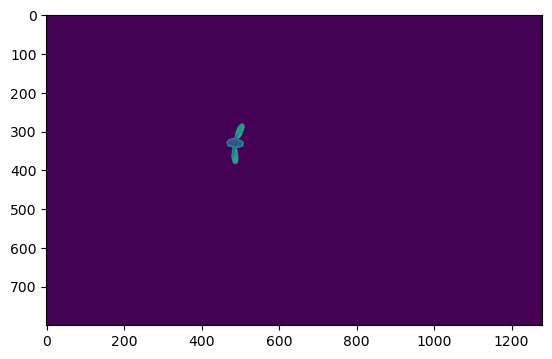

In [5]:
cam = 'cam1'
plt.imshow(image[cam].image )


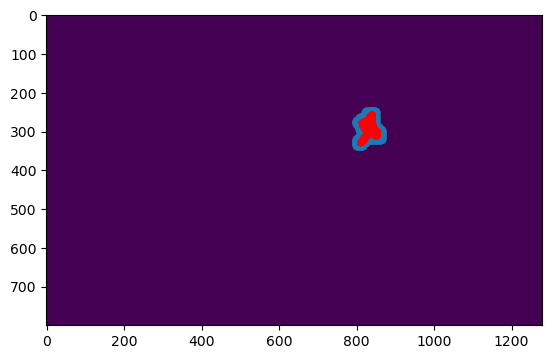

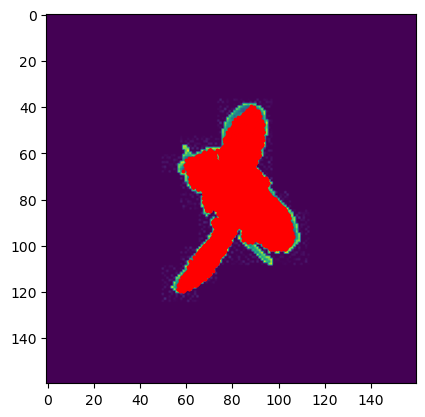

In [2]:
cam = 'cam3'
proj = cameras[cam].project_on_cam(points.points_in_ew_frame_homo,cameras[cam].camera_matrix)
px = image[cam].pixels

top_left = image[cam].crop_image()
cameras[cam].camera_calibration_crop(top_left)
proj_crop = cameras[cam].project_on_cam(points.points_in_ew_frame,cameras[cam].croped_camera_matrix)

plt.imshow(image[cam].image )
plt.scatter(px[:,1],px[:,0])
plt.scatter(proj[:,0] ,proj[:,1],s = 3,c='r')
plt.figure()
plt.imshow(image[cam].croped_image)
plt.scatter(proj_crop[:,0],proj_crop[:,1],s = 3,c='r')

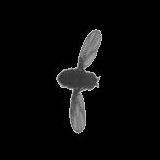

In [22]:
image[f'cam1'].croped_image

In [3]:


gen_gs_data = GenerateGsInput(path,image,cameras)
gen_gs_data.generate_camera_text()
gen_gs_data.save_croped_images()


In [4]:
image[cam].croped_image.save(f'{image[cam].path}/input_data_for_gs/images/P{image[cam].frame}CAM{image[cam].cam}.jpg')


In [5]:
[image[cam].croped_image.save(f'{path}/images/P{cam}{im_idx}.jpg') for im_idx,cam in enumerate(cameras.keys())]

AttributeError: 'ImageFly' object has no attribute 'croped_image'

In [4]:
cameras['cam4'].rotmat2qvec()
cameras['cam4'].qvec

array([ 4.99659604e-03, -9.99900683e-01, -3.64675249e-04, -1.31729114e-02])

In [ ]:
# Image list with two lines of data per image:
#   IMAGE_ID, QW, QX, QY, QZ, TX, TY, TZ, CAMERA_ID, NAME
#   POINTS2D[] as (X, Y, POINT3D_ID)
# Number of images: 2, mean observations per image: 2
1 0.851773 0.0165051 0.503764 -0.142941 -0.737434 1.02973 3.74354 1 P1180141.JPG
2362.39 248.498 58396 1784.7 268.254 59027 1784.7 268.254 -1
2 0.851773 0.0165051 0.503764 -0.142941 -0.737434 1.02973 3.74354 1 P1180142.JPG
1190.83 663.957 23056 1258.77 640.354 59070

array([[491.42585268, 317.8091548 ],
       [502.13323285, 323.73585245],
       [491.17388637, 317.67233787],
       ...,
       [477.40529575, 336.66660918],
       [476.95713036, 337.48289853],
       [477.389475  , 337.72869366]])

In [16]:
flatten([idx, list(image.qvec), image.t.T, image.camera_number,frames_name])

NameError: name 'flatten' is not defined

In [16]:
images['P300CAM1.jpg'].croped_pixels.shape

(2464, 2)

In [38]:
import os
path = 'I:/My Drive/Research/gs_data/mov19_2022_03_03'

images_folder = f'{path}/input_data_for_gs/sparse/' 
if not os.path.exists(f'{path}/input_data_for_gs/sparse/'):
    os.makedirs(images_folder)


with open(f'{images_folder}/images.txt', "w") as file:
    file.write("# Image list with two lines of data per image:\n#")
    file.write("#   IMAGE_ID, QW, QX, QY, QZ, TX, TY, TZ, CAMERA_ID, NAME\n")
    file.write("#   POINTS2D[] as (X, Y, POINT3D_ID)\n")
    file.write(f"# Number of images: {len(images)}, mean observations per image: 2 \n")

    for idx,(frames_name,image) in enumerate(images.items()): 

        camera_data = [idx] + list(image.qvec) + list(image.t.T[0]) + [image.camera_number] + [frames_name]
        print(camera_data)
        file.write(" ".join(map(str, camera_data)) + "\n")
        ponts2d = [image.croped_pixels]
        file.write(" ".join(map(str, camera_data)) + "\n")

[0, 0.40141820283900637, -0.7619356013643706, 0.4480877832223714, -0.2398643456828853, -0.0009995330536695464, -0.000963379647275542, -0.27667278893559305, 1, 'P300CAM1.jpg']
[1, 0.010196539225855067, 0.49418003263308263, -0.4900952552178714, 0.7179754638896167, -2.3405244476857152e-06, 0.003103373568684653, -0.19604126118852686, 2, 'P300CAM2.jpg']
[2, 0.005566844212601766, -0.5137344711486188, -0.4945975830212957, 0.7010129344517506, 0.0018709171011325818, 0.0016270343699767798, -0.19135574843655634, 3, 'P300CAM3.jpg']
[3, 0.004996596039281802, -0.9999006827911814, -0.00036467524885919173, -0.013172911360534499, -0.002034118658308913, 0.002187200103057826, -0.19123460135434145, 4, 'P300CAM4.jpg']
[4, 0.40141820283900637, -0.7619356013643706, 0.4480877832223714, -0.2398643456828853, -0.0009995330536695464, -0.000963379647275542, -0.27667278893559305, 1, 'P400CAM1.jpg']
[5, 0.010196539225855067, 0.49418003263308263, -0.4900952552178714, 0.7179754638896167, -2.3405244476857152e-06, 0.003

In [40]:
image.pixels

array([[ 72, 600],
       [ 72, 602],
       [ 72, 603],
       ...,
       [159, 600],
       [159, 602],
       [159, 607]], dtype=int64)

In [17]:
import os
path = 'G:/My Drive/Research/gs_data/mov19_2022_03_03'

sparse_folder = f'{path}/input_data_for_gs/sparse/' 
if not os.path.exists(f'{path}/input_data_for_gs/sparse/'):
    os.makedirs(sparse_folder)


with open(f'{sparse_folder}/cameras.txt', "w") as file:
    file.write("# Camera list with one line of data per camera:\n#   CAMERA_ID, MODEL, WIDTH, HEIGHT, PARAMS[]\n")
    file.write(f"# Number of cameras: {len(cameras)}\n")
    for camera in cameras.values(): 
        intrinsic = np.round(np.array(camera.K),2)
        camera_data = [camera.camera_number, "PINHOLE", 1280, 800, intrinsic[0,0], intrinsic[1,1], intrinsic[0,2], intrinsic[1,2]]
        file.write(" ".join(map(str, camera_data)) + "\n")


In [18]:
import matplotlib.pyplot as plt
cam = 'cam4'

path = 'D:/Documents/mov19_2022_03_03/'
image = {f'cam{cam + 1}':ImageFly(path,frame,cam) for cam in range(4)}
px = image[cam].pixels

proj = cameras[cam].project_on_cam(points.points_in_ew_frame,cameras[cam].camera_matrix)
plt.imshow(image[cam].image)
plt.scatter(px[:,0],px[:,1])

plt.scatter(proj[:,0],proj[:,1])


In [19]:
plt.figure();plt.scatter(px[:,0],px[:,1])

plt.scatter(proj[:,0],proj[:,1])

In [20]:
path = 'D:/Documents/mov19_2022_03_03/'

points.idx_to_real()


In [21]:
from ImageFly import ImageFly
path = 'D:/Documents/mov19_2022_03_03/'
frame = 360

cam = 1

plt.imshow(image.image)



AttributeError: 'dict' object has no attribute 'image'

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from ImageFly import ImageFly
path = 'D:/Documents/mov19_2022_03_03/'
frame = 360

cam = 1
im = np.stack([np.array(Image.open(f'{path}images/P{frame}CAM{cam + 1}.jpg')) for cam in range(4)])
im_num,y,x = np.where(im > 0)




plt.imshow(im[2])
plt.scatter(x,y)

NameError: name 'np' is not defined

In [7]:
import scipy.io
import pandas as pd
import numpy as np
from Points3D import Points3D
path = 'G:/My Drive/Research/gs_data/mov19_2022_03_03'

point = Points3D(path)
pts = point.get_frame(73)
np.array([point.real_coord[point.frame[ax],idx] for idx,ax in enumerate(['X','Y','Z'])])

[array([-0.00025, -0.00025, -0.00025, ...,  0.00145,  0.0014 ,  0.0013 ]),
 array([-0.01335, -0.01325, -0.0132 , ..., -0.0145 , -0.01445, -0.0144 ]),
 array([0.0016 , 0.00165, 0.0017 , ..., 0.0032 , 0.0032 , 0.0032 ])]